In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
filepath = "C:/Users/ken09/Desktop/data/titanic3.xls"
all_df = pd.read_excel(filepath)

In [3]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp','parch', 'fare', 'embarked']
all_df=all_df[cols]

In [4]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [5]:
print('total:',len(all_df),'train:',len(train_df),'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [7]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked"])
    
    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)
    
    return scaledFeatures,Label

In [8]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [11]:
model = Sequential()

In [12]:
model.add(Dense(units=40, input_dim=9,kernel_initializer='uniform',activation='relu'))

In [13]:
model.add(Dense(units=30,kernel_initializer='uniform',activation='relu'))

In [14]:
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
train_history=model.fit(x=train_Features,y=train_Label,validation_split=0.1,epochs=30,batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 1s - loss: 0.6899 - acc: 0.5774 - val_loss: 0.6706 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6676 - acc: 0.5989 - val_loss: 0.5913 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6098 - acc: 0.6667 - val_loss: 0.4940 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5455 - acc: 0.7624 - val_loss: 0.4628 - val_acc: 0.7692
Epoch 5/30
 - 0s - loss: 0.5061 - acc: 0.7602 - val_loss: 0.4538 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4905 - acc: 0.7645 - val_loss: 0.4393 - val_acc: 0.7788
Epoch 7/30
 - 0s - loss: 0.4817 - acc: 0.7602 - val_loss: 0.4421 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.4784 - acc: 0.7570 - val_loss: 0.4346 - val_acc: 0.7981
Epoch 9/30
 - 0s - loss: 0.4727 - acc: 0.7624 - val_loss: 0.4268 - val_acc: 0.7981
Epoch 10/30
 - 0s - loss: 0.4695 - acc: 0.7753 - val_loss: 0.4251 - val_acc: 0.8077
Epoch 11/30
 - 0s - loss: 0.4654 - acc: 0.7634 - val_loss: 0.4221 - val_acc: 0.8173
Epoch 12/30
 - 0s - loss: 0.4637 - acc:

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

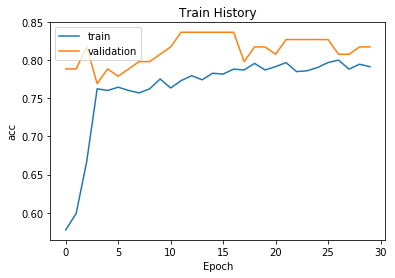

In [18]:
show_train_history(train_history,'acc','val_acc')

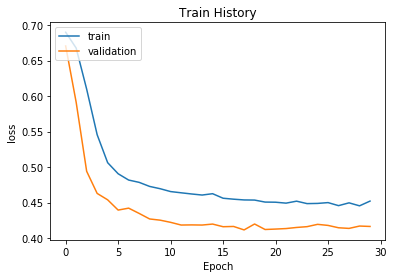

In [19]:
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x=test_Features,y=test_Label)

275/275 [==============================] - 0s 45us/step


In [22]:
scores[1]

0.8109090913425793

In [23]:
Jack = pd.Series([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])

In [24]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],
                     columns=['survived', 'name','pclass', 'sex','age', 'sibsp','parch', 'fare','embarked'])

In [25]:
all_df=pd.concat([all_df,JR_df])

In [26]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [27]:
all_Features,Label=PreprocessData(all_df)

In [29]:
all_probability=model.predict(all_Features)

In [30]:
all_probability[:10]

array([[0.9771761 ],
       [0.60866094],
       [0.9725948 ],
       [0.40559354],
       [0.97170943],
       [0.27101153],
       [0.95154095],
       [0.3267846 ],
       [0.9497513 ],
       [0.29050314]], dtype=float32)

In [31]:
pd=all_df
pd.insert(len(all_df.columns),'probability',all_probability)

In [32]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.150166
1,1,Rose,1,female,20.0,1,0,100.0,S,0.970011


In [33]:
pd[(pd['survived']==0) & (pd['probability']>0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.972595
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.971709
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.978317
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.976383
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.964989


In [34]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.977176
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.608661
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.972595
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.405594
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.971709
